In [3]:
import pandas as pd

In [4]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).rename(columns={'TransactionID': 'TransactionCount'}).reset_index()

In [6]:
customer_features = customer_features.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [9]:
customer_clustering_data = customer_features.iloc[:, 1:]
scaler = MinMaxScaler()
scaled_clustering_data = scaler.fit_transform(customer_clustering_data)

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_clustering_data)


c:\Users\mtalh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
db_index = davies_bouldin_score(scaled_clustering_data, customer_features['Cluster'])
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.6096598426881008


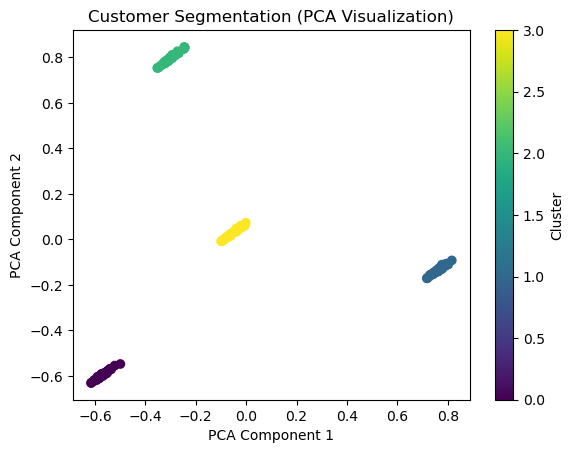

In [12]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_clustering_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=customer_features['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()